<h2 align = "center">Fake News Detection using Bag of words (n grams)</h2>

* Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.
* Fake news spreads faster than Real news and creates problems and fear among groups and in society.
* We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.
* We are using Bag of n-grams to pre-process the text and apply different classification algorithms.
* Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

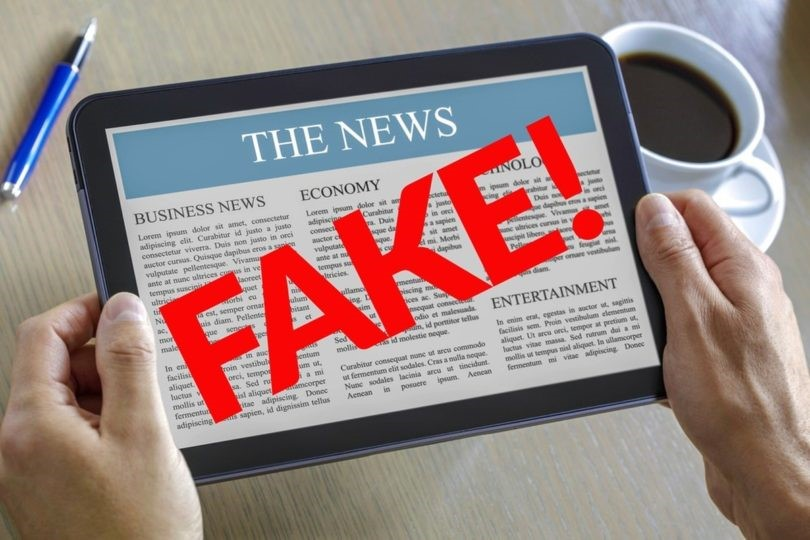

<h2> Fake News Detection Dataset</h2>
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

* This data consists of two columns. - Text - label
* Text is the statements or messages regarding a particular event/situation.
* label feature tells whether the given Text is Fake or Real.
* As there are only 2 classes, this problem comes under the Binary Classification.



In [80]:
# importing libraries
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Fake_Real_Data.csv")
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
df.shape

(9900, 2)

In [4]:
df = df.drop_duplicates()

In [5]:
df.shape

(9865, 2)

In [6]:
df.isnull().sum()

Text     0
label    0
dtype: int64

In [7]:
value_counts = pd.Series(df.label.value_counts())
value_counts

label
Fake    5000
Real    4865
Name: count, dtype: int64

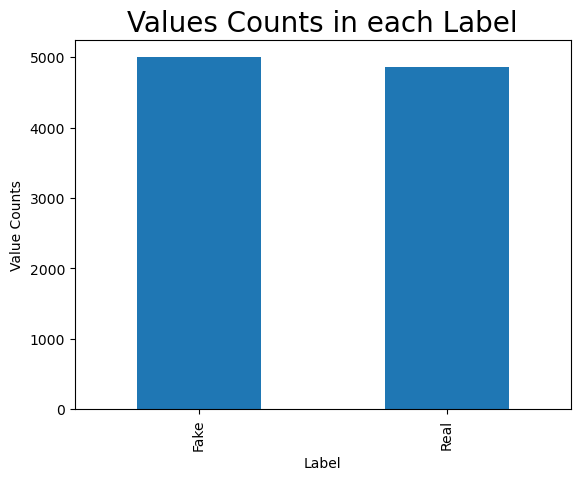

In [8]:
value_counts.plot(kind="bar",  fontsize = 10.00)
plt.xlabel("Label", fontsize=10)
plt.ylabel("Value Counts", fontsize=10)
plt.title("Values Counts in each Label", fontsize=20 )
plt.show()

Looks data is balanced

In [9]:
# encode target colimn

df["label"] = df.label.replace({"Fake": 0, "Real":1})
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0
1,U.S. conservative leader optimistic of common ...,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",1
3,Court Forces Ohio To Allow Millions Of Illega...,0
4,Democrats say Trump agrees to work on immigrat...,1


<h2>Modelling without Pre-processing Text data</h2>

In [10]:
#train test split

X_train, x_test, y_train, y_test = train_test_split( df["Text"], df["label"], test_size=0.2,  random_state=52,stratify=df.label)

In [11]:
X_train.head()

7637    Senators Burr, Tillis oppose Trump's EPA nomin...
8381    U.S. lawmakers want crackdown on Facebook, Twi...
1044     Looks Like Mike Pence Is Gonna Go Down With T...
3300    Illinois governor to block Chicago schools' fu...
7719    House panel wants Comey recordings WASHINGTON ...
Name: Text, dtype: object

In [12]:
print("X_train Shape is:",X_train.shape)
print("X_test Shape is:",x_test.shape)
print("y_train Shape is:",y_train.shape)
print("y_test Shape is:",y_test.shape)

X_train Shape is: (7892,)
X_test Shape is: (1973,)
y_train Shape is: (7892,)
y_test Shape is: (1973,)


In [13]:
print("Value counts in y_train :\n", y_train.value_counts())

Value counts in y_train :
 label
0    4000
1    3892
Name: count, dtype: int64


In [14]:
print("Value counts in y_test :\n", y_test.value_counts())

Value counts in y_test :
 label
0    1000
1     973
Name: count, dtype: int64


The splits are almost balanced

<h2>Attempt 1 : Using KNN<h2>

* KNN Parameters used:  n_neighbors of 10 and metric as 'euclidean' distance.
* Using CountVectorizer with unigram, bigram, and trigrams.

In [15]:
#creating table to track all the scores

model_scores_with_raw_data = pd.DataFrame( columns= ["Model", "Metrics Used", "N Grams", "F1 Score", "Accuracy Score"])
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score


In [16]:
#unigram
knn_model = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ("knn", KNeighborsClassifier(n_neighbors=10, metric="euclidean"))
])

In [17]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [18]:
y_predict = knn_model.predict(x_test)

print("Classifcation report for KNN model having euclidean distance & unigrams:\n", classification_report(y_test, y_predict))

Classifcation report for KNN model having euclidean distance & unigrams:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1000
           1       0.92      0.97      0.94       973

    accuracy                           0.94      1973
   macro avg       0.94      0.94      0.94      1973
weighted avg       0.94      0.94      0.94      1973



In [19]:
knn1_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
knn1_accuracy_score

'0.9437'

In [20]:
knn1_f1_score = "{:.4f}".format(f1_score(y_test, y_predict))
knn1_f1_score

'0.9443'

In [21]:
new_details =pd.DataFrame( {
    "Model": ["KNN"],
    "Metrics Used": [{"n_neighbors": 10, "metric": 'euclidean'}],
    "N Grams": ["Unigram"],
    "F1 Score": [knn1_f1_score],
    "Accuracy Score": [knn1_accuracy_score]
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437


In [22]:
#bigram
knn_model2 = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ("knn", KNeighborsClassifier(n_neighbors=10, metric="euclidean"))
])

knn_model2.fit(X_train, y_train)

y_predict = knn_model2.predict(x_test)

print("Classifcation report for KNN model having euclidean distance & bigrams:\n", classification_report(y_test, y_predict))

Classifcation report for KNN model having euclidean distance & bigrams:
               precision    recall  f1-score   support

           0       0.96      0.73      0.83      1000
           1       0.78      0.97      0.86       973

    accuracy                           0.85      1973
   macro avg       0.87      0.85      0.85      1973
weighted avg       0.87      0.85      0.85      1973



In [23]:
knn2_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
knn2_f1_score = "{:.4f}".format(f1_score(y_test, y_predict))

In [24]:
new_details =pd.DataFrame( {
    "Model": ["KNN"],
    "Metrics Used": [{"n_neighbors": 10, "metric": 'euclidean'}],
    "N Grams": ["bigram"],
    "F1 Score": [knn2_f1_score],
    "Accuracy Score": [knn2_accuracy_score]
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485


In [25]:
#trigram
knn_model3 = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ("knn", KNeighborsClassifier(n_neighbors=10, metric="euclidean"))
])

knn_model3.fit(X_train, y_train)

y_predict = knn_model3.predict(x_test)

print("Classifcation report for KNN model having euclidean distance & bigrams:\n", classification_report(y_test, y_predict))

Classifcation report for KNN model having euclidean distance & bigrams:
               precision    recall  f1-score   support

           0       0.96      0.45      0.61      1000
           1       0.63      0.98      0.77       973

    accuracy                           0.71      1973
   macro avg       0.80      0.72      0.69      1973
weighted avg       0.80      0.71      0.69      1973



In [26]:
knn3_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
knn3_f3_score = "{:.4f}".format(f1_score(y_test, y_predict))

In [27]:
new_details =pd.DataFrame( {
    "Model": ["KNN"],
    "Metrics Used": [{"n_neighbors": 10, "metric": 'euclidean'}],
    "N Grams": ["trigram"],
    "F1 Score": [knn3_f3_score],
    "Accuracy Score": [knn3_accuracy_score]
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121


<h2>Attempt 2 : Using KNN<h2>

* KNN Parameters used:  n_neighbors of 10 and metric as 'cosine' distance.
* Using CountVectorizer with unigram, bigram, and trigrams.

In [28]:
#imigram
knn_model4 = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ("knn", KNeighborsClassifier(n_neighbors=10, metric="cosine"))
])

knn_model4.fit(X_train, y_train)

y_predict = knn_model4.predict(x_test)

knn4_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
knn4_f3_score = "{:.4f}".format(f1_score(y_test, y_predict))

print("Classifcation report for KNN model having euclidean distance & bigrams:\n", classification_report(y_test, y_predict))

Classifcation report for KNN model having euclidean distance & bigrams:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      1000
           1       0.88      0.99      0.93       973

    accuracy                           0.93      1973
   macro avg       0.93      0.93      0.93      1973
weighted avg       0.94      0.93      0.93      1973



In [29]:
new_details =pd.DataFrame( {
    "Model": ["KNN"],
    "Metrics Used": [{"n_neighbors": 10, "metric": 'cosine'}],
    "N Grams": ["unigram"],
    "F1 Score": [knn4_f3_score],
    "Accuracy Score": [knn4_accuracy_score]
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280


In [30]:
#bigram
knn_model5 = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ("knn", KNeighborsClassifier(n_neighbors=10, metric="cosine"))
])

knn_model5.fit(X_train, y_train)

y_predict = knn_model5.predict(x_test)

knn5_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
knn5_f3_score = "{:.4f}".format(f1_score(y_test, y_predict))

print("Classifcation report for KNN model having euclidean distance & bigrams:\n", classification_report(y_test, y_predict))

Classifcation report for KNN model having euclidean distance & bigrams:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83      1000
           1       0.77      0.99      0.87       973

    accuracy                           0.85      1973
   macro avg       0.88      0.85      0.85      1973
weighted avg       0.88      0.85      0.85      1973



In [31]:
new_details =pd.DataFrame( {
    "Model": ["KNN"],
    "Metrics Used": [{"n_neighbors": 10, "metric": 'cosine'}],
    "N Grams": ["bigram"],
    "F1 Score": [knn5_f3_score],
    "Accuracy Score": [knn5_accuracy_score]
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510


In [32]:
#trigram
knn_model6 = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ("knn", KNeighborsClassifier(n_neighbors=10, metric="cosine"))
])

knn_model6.fit(X_train, y_train)

y_predict = knn_model6.predict(x_test)

knn6_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
knn6_f3_score = "{:.4f}".format(f1_score(y_test, y_predict))

print("Classifcation report for KNN model having euclidean distance & bigrams:\n", classification_report(y_test, y_predict))

Classifcation report for KNN model having euclidean distance & bigrams:
               precision    recall  f1-score   support

           0       0.99      0.58      0.74      1000
           1       0.70      1.00      0.82       973

    accuracy                           0.79      1973
   macro avg       0.85      0.79      0.78      1973
weighted avg       0.85      0.79      0.78      1973



In [33]:
new_details =pd.DataFrame( {
    "Model": ["KNN"],
    "Metrics Used": [{"n_neighbors": 10, "metric": 'cosine'}],
    "N Grams": ["trigram"],
    "F1 Score": [knn6_f3_score],
    "Accuracy Score": [knn6_accuracy_score]
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876


<h2>Attempt 3 : Using Random Forest<h2>

* KNN Parameters used: None
* Using CountVectorizer trigrams.

In [34]:
#bigram
rf_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ("rf",RandomForestClassifier() )
])

rf_model.fit(X_train, y_train)

y_predict = rf_model.predict(x_test)

rf_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
rf_f3_score = "{:.4f}".format(f1_score(y_test, y_predict))

print("Classifcation report for Random Forest:\n", classification_report(y_test, y_predict))

Classifcation report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      0.99      1.00       973

    accuracy                           1.00      1973
   macro avg       1.00      1.00      1.00      1973
weighted avg       1.00      1.00      1.00      1973



In [35]:
new_details =pd.DataFrame( {
    "Model": ["Random Forest"],
    "Metrics Used": " ",
    "N Grams": ["trigram"],
    "F1 Score": [rf_f3_score],
    "Accuracy Score": [rf_accuracy_score]
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876
6,Random Forest,,trigram,0.9954,0.9954


<h2>Attempt 4:  Multinomial Naive Bayes </h2>

Metrics: alpha value of 0.75.

In [37]:
#unigram
nb_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,1))),
    ("rf",MultinomialNB(alpha=0.75) )
])

nb_model.fit(X_train, y_train)

y_predict = nb_model.predict(x_test)

nb_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
nb_f3_score = "{:.4f}".format(f1_score(y_test, y_predict))

print("Classifcation report for Random Forest:\n", classification_report(y_test, y_predict))

Classifcation report for Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.98      0.98       973

    accuracy                           0.98      1973
   macro avg       0.98      0.98      0.98      1973
weighted avg       0.98      0.98      0.98      1973



In [38]:
new_details =pd.DataFrame( {
    "Model": ["Multinomial Naive Bayes"],
    "Metrics Used": [{"alpha":0.75}],
    "N Grams": ["unigram"],
    "F1 Score": [nb_f3_score],
    "Accuracy Score": [nb_accuracy_score]
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876
6,Random Forest,,trigram,0.9954,0.9954
7,Multinomial Naive Bayes,{'alpha': 0.75},unigram,0.9769,0.9772


In [39]:
#bigram
nb2_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ("rf",MultinomialNB(alpha=0.75) )
])

nb2_model.fit(X_train, y_train)

y_predict = nb2_model.predict(x_test)

nb2_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
nb2_f3_score = "{:.4f}".format(f1_score(y_test, y_predict))

print("Classifcation report for Random Forest:\n", classification_report(y_test, y_predict))

Classifcation report for Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1000
           1       0.99      0.98      0.99       973

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973



In [40]:
new_details =pd.DataFrame( {
    "Model": ["Multinomial Naive Bayes"],
    "Metrics Used": [{"alpha":0.75}],
    "N Grams": ["bigram"],
    "F1 Score": [nb2_f3_score],
    "Accuracy Score": [nb2_accuracy_score]
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876
6,Random Forest,,trigram,0.9954,0.9954
7,Multinomial Naive Bayes,{'alpha': 0.75},unigram,0.9769,0.9772
8,Multinomial Naive Bayes,{'alpha': 0.75},bigram,0.9856,0.9858


**Lets add Text Type column**

In [41]:
model_scores_with_raw_data["Text Type"] = "raw"

In [43]:
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score,Text Type
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437,raw
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485,raw
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121,raw
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280,raw
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510,raw
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876,raw
6,Random Forest,,trigram,0.9954,0.9954,raw
7,Multinomial Naive Bayes,{'alpha': 0.75},unigram,0.9769,0.9772,raw
8,Multinomial Naive Bayes,{'alpha': 0.75},bigram,0.9856,0.9858,raw


<h2 align="center"> Text Pre-Processing</h2>

Let's apply pre - processing to text data to remove stop words and , punctuation and apply lemmatization

In [44]:
#loading english language small model & creating object of it

nlp =spacy.load("en_core_web_sm")


def preprocess(text):
    """
    Input: Text Data
    Output: Filtred text data which is removed stop words, punctuaions and gtting base word from raw text

    Docstring: Using spacy library by iterating through the raw text , removing stop words ,  punctations & get final lemmtized words
    """
    doc = nlp(text)
    
    filtered_text = []

    for token in doc:
        if token.is_stop and token.is_punct:
            continue
        filtered_text.append(token.lemma_)
    return " ".join(filtered_text)

In [48]:
#create column for filtered text

df["preprocessed_text"] = df.Text.apply(preprocess)
df.head()

,Text,label,preprocessed_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0,Top Trump Surrogate BRUTALLY Stabs Him in th...
1,U.S. conservative leader optimistic of common ...,1,U.S. conservative leader optimistic of common ...
2,"Trump proposes U.S. tax overhaul, stirs concer...",1,"trump propose U.S. tax overhaul , stir concern..."
3,Court Forces Ohio To Allow Millions Of Illega...,0,Court Forces Ohio to allow million of illega...
4,Democrats say Trump agrees to work on immigrat...,1,Democrats say Trump agree to work on immigrati...


In [49]:
#train test split using pre processed text

X_train, x_test, y_train, y_test = train_test_split( df["preprocessed_text"], df["label"], test_size=0.2,  random_state=52,stratify=df.label)

In [50]:
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score,Text Type
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437,raw
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485,raw
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121,raw
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280,raw
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510,raw
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876,raw
6,Random Forest,,trigram,0.9954,0.9954,raw
7,Multinomial Naive Bayes,{'alpha': 0.75},unigram,0.9769,0.9772,raw
8,Multinomial Naive Bayes,{'alpha': 0.75},bigram,0.9856,0.9858,raw


As we got best models from previous trails using raw data , Random forest & Multinomial Naive Bayes are best models, try on those

<h3 align = "center">Apply models on preprocessed data</h3>

<h2>Attempt 1: Random Forest</h2>
 Using Unigram, Bigram, Trigram

In [51]:
#trigram
rf1_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ("rf",RandomForestClassifier() )
])

rf1_model.fit(X_train, y_train)



Classifcation report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       1.00      0.99      0.99       973

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973



In [54]:
y_predict = rf1_model.predict(x_test)

rf1_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
rf1_f3_score = "{:.4f}".format(f1_score(y_test, y_predict))


print("Classifcation report for Random Forest:\n", classification_report(y_test, y_predict))

Classifcation report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       1.00      0.99      0.99       973

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973



In [58]:
new_details =pd.DataFrame( {
    "Model": ["Random Forest"],
    "Metrics Used": " ",
    "N Grams": ["trigram"],
    "F1 Score": [rf1_f3_score],
    "Accuracy Score": [rf1_accuracy_score],
    "Text Type": "preprocessed"
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score,Text Type
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437,raw
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485,raw
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121,raw
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280,raw
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510,raw
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876,raw
6,Random Forest,,trigram,0.9954,0.9954,raw
7,Multinomial Naive Bayes,{'alpha': 0.75},unigram,0.9769,0.9772,raw
8,Multinomial Naive Bayes,{'alpha': 0.75},bigram,0.9856,0.9858,raw
9,Random Forest,,trigram,0.9917,0.9919,preprocessed


In [59]:
#bigram
rf2_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ("rf",RandomForestClassifier() )
])

rf2_model.fit(X_train, y_train)

y_predict = rf2_model.predict(x_test)

rf2_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
rf2_f3_score = "{:.4f}".format(f1_score(y_test, y_predict))


print("Classifcation report for Random Forest - Bigram:\n", classification_report(y_test, y_predict))

Classifcation report for Random Forest - Bigram:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      0.99      1.00       973

    accuracy                           1.00      1973
   macro avg       1.00      1.00      1.00      1973
weighted avg       1.00      1.00      1.00      1973



In [60]:
new_details =pd.DataFrame( {
    "Model": ["Random Forest"],
    "Metrics Used": " ",
    "N Grams": ["bigram"],
    "F1 Score": [rf2_f3_score],
    "Accuracy Score": [rf2_accuracy_score],
    "Text Type": "preprocessed"
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score,Text Type
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437,raw
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485,raw
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121,raw
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280,raw
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510,raw
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876,raw
6,Random Forest,,trigram,0.9954,0.9954,raw
7,Multinomial Naive Bayes,{'alpha': 0.75},unigram,0.9769,0.9772,raw
8,Multinomial Naive Bayes,{'alpha': 0.75},bigram,0.9856,0.9858,raw
9,Random Forest,,trigram,0.9917,0.9919,preprocessed


In [61]:
#unigram
rf3_model = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,1))),
    ("rf",RandomForestClassifier() )
])

rf3_model.fit(X_train, y_train)

y_predict = rf3_model.predict(x_test)

rf3_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
rf3_f3_score = "{:.4f}".format(f1_score(y_test, y_predict))


print("Classifcation report for Random Forest - Unigram:\n", classification_report(y_test, y_predict))

Classifcation report for Random Forest - Unigram:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      0.99      0.99       973

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973



In [62]:
new_details =pd.DataFrame( {
    "Model": ["Random Forest"],
    "Metrics Used": " ",
    "N Grams": ["Unigram"],
    "F1 Score": [rf3_f3_score],
    "Accuracy Score": [rf3_accuracy_score],
    "Text Type": "preprocessed"
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score,Text Type
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437,raw
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485,raw
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121,raw
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280,raw
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510,raw
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876,raw
6,Random Forest,,trigram,0.9954,0.9954,raw
7,Multinomial Naive Bayes,{'alpha': 0.75},unigram,0.9769,0.9772,raw
8,Multinomial Naive Bayes,{'alpha': 0.75},bigram,0.9856,0.9858,raw
9,Random Forest,,trigram,0.9917,0.9919,preprocessed


<h2>Attempt 2: Multinomial Naive Bayes</h2>

In [63]:
#unigram
nb_model1 = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,1))),
    ("rf",MultinomialNB(alpha=0.75) )
])

nb_model1.fit(X_train, y_train)

y_predict = nb_model1.predict(x_test)

nb_accuracy_score1 = "{:.4f}".format(accuracy_score(y_test, y_predict))
nb_f3_score1 = "{:.4f}".format(f1_score(y_test, y_predict))

print("Classifcation report for Multinomial Naive Bayes - Unigram:\n", classification_report(y_test, y_predict))

Classifcation report for Multinomial Naive Bayes - Unigram:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.98      0.98       973

    accuracy                           0.98      1973
   macro avg       0.98      0.98      0.98      1973
weighted avg       0.98      0.98      0.98      1973



In [67]:
new_details =pd.DataFrame( {
    "Model": ["Multinomial Naive Bayes"],
    "Metrics Used": [{"alpha":0.75}],
    "N Grams": ["unigram"],
    "F1 Score": [nb_f3_score1],
    "Accuracy Score": [nb_accuracy_score1],
    "Text Type": "preprocessed"
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score,Text Type
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437,raw
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485,raw
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121,raw
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280,raw
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510,raw
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876,raw
6,Random Forest,,trigram,0.9954,0.9954,raw
7,Multinomial Naive Bayes,{'alpha': 0.75},unigram,0.9769,0.9772,raw
8,Multinomial Naive Bayes,{'alpha': 0.75},bigram,0.9856,0.9858,raw
9,Random Forest,,trigram,0.9917,0.9919,preprocessed


In [68]:
#bigram
nb_model2 = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ("rf",MultinomialNB(alpha=0.75) )
])

nb_model2.fit(X_train, y_train)

y_predict = nb_model2.predict(x_test)

nb_accuracy_score2 = "{:.4f}".format(accuracy_score(y_test, y_predict))
nb_f3_score2 = "{:.4f}".format(f1_score(y_test, y_predict))

print("Classifcation report for Multinomial Naive Bayes - Bigram:\n", classification_report(y_test, y_predict))

Classifcation report for Multinomial Naive Bayes - Bigram:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1000
           1       0.99      0.98      0.98       973

    accuracy                           0.98      1973
   macro avg       0.98      0.98      0.98      1973
weighted avg       0.98      0.98      0.98      1973



In [69]:
new_details =pd.DataFrame( {
    "Model": ["Multinomial Naive Bayes"],
    "Metrics Used": [{"alpha":0.75}],
    "N Grams": ["bigram"],
    "F1 Score": [nb_f3_score2],
    "Accuracy Score": [nb_accuracy_score2],
    "Text Type": "preprocessed"
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score,Text Type
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437,raw
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485,raw
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121,raw
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280,raw
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510,raw
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876,raw
6,Random Forest,,trigram,0.9954,0.9954,raw
7,Multinomial Naive Bayes,{'alpha': 0.75},unigram,0.9769,0.9772,raw
8,Multinomial Naive Bayes,{'alpha': 0.75},bigram,0.9856,0.9858,raw
9,Random Forest,,trigram,0.9917,0.9919,preprocessed


In [70]:
#trigram
nb_model3 = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,3))),
    ("rf",MultinomialNB(alpha=0.75) )
])

nb_model3.fit(X_train, y_train)

y_predict = nb_model3.predict(x_test)

nb_accuracy_score3 = "{:.4f}".format(accuracy_score(y_test, y_predict))
nb_f3_score3 = "{:.4f}".format(f1_score(y_test, y_predict))

print("Classifcation report for Multinomial Naive Bayes - Bigram:\n", classification_report(y_test, y_predict))

Classifcation report for Multinomial Naive Bayes - Bigram:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1000
           1       0.99      0.98      0.99       973

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973



In [71]:
new_details =pd.DataFrame( {
    "Model": ["Multinomial Naive Bayes"],
    "Metrics Used": [{"alpha":0.75}],
    "N Grams": ["trigram"],
    "F1 Score": [nb_f3_score3],
    "Accuracy Score": [nb_accuracy_score3],
    "Text Type": "preprocessed"
})
model_scores_with_raw_data = pd.concat([model_scores_with_raw_data, new_details], ignore_index=True)
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score,Text Type
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437,raw
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485,raw
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121,raw
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280,raw
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510,raw
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876,raw
6,Random Forest,,trigram,0.9954,0.9954,raw
7,Multinomial Naive Bayes,{'alpha': 0.75},unigram,0.9769,0.9772,raw
8,Multinomial Naive Bayes,{'alpha': 0.75},bigram,0.9856,0.9858,raw
9,Random Forest,,trigram,0.9917,0.9919,preprocessed


<h2>Conclsuions:</h2>

Lets Look into best model in above

In [72]:
model_scores_with_raw_data["F1 Score"].max()

'0.9959'

In [74]:
model_scores_with_raw_data[model_scores_with_raw_data["F1 Score"]==model_scores_with_raw_data["F1 Score"].max()]

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score,Text Type
10,Random Forest,,bigram,0.9959,0.9959,preprocessed


Here we are getting best results from where `data is preprocessed, used bigrams & applied Random Forest model,`

Let's create confusion matrix for this model

In [75]:
y_predict = rf2_model.predict(x_test)
rf2_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_predict))
rf2_f3_score = "{:.4f}".format(f1_score(y_test, y_predict))


In [76]:
rf2_f3_score

'0.9959'

In [79]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[998,   2],
       [  6, 967]], dtype=int64)

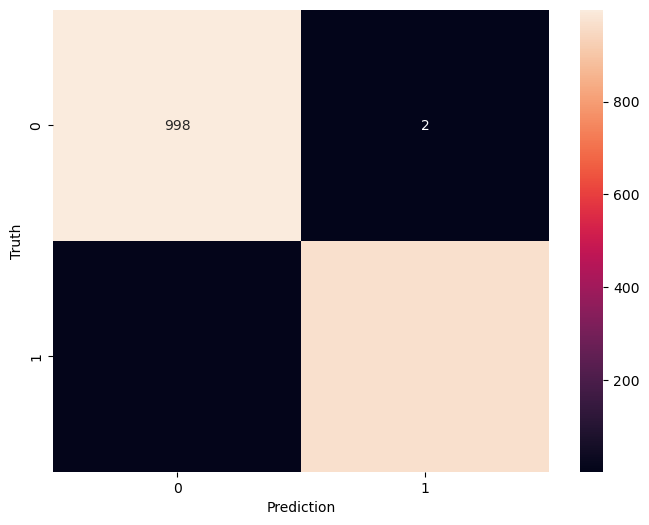

In [87]:
#confuion matrix using heatmap
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

<h2>Observations</h2>

As ML algorithms don't learn directly from text data , so we converted them into numeric using Bag of words method which is high dimensional (CountVectorizer).

In [88]:
model_scores_with_raw_data

,Model,Metrics Used,N Grams,F1 Score,Accuracy Score,Text Type
0,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",Unigram,0.9443,0.9437,raw
1,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",bigram,0.8635,0.8485,raw
2,KNN,"{'n_neighbors': 10, 'metric': 'euclidean'}",trigram,0.7704,0.7121,raw
3,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",unigram,0.9314,0.9280,raw
4,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",bigram,0.8682,0.8510,raw
5,KNN,"{'n_neighbors': 10, 'metric': 'cosine'}",trigram,0.8222,0.7876,raw
6,Random Forest,,trigram,0.9954,0.9954,raw
7,Multinomial Naive Bayes,{'alpha': 0.75},unigram,0.9769,0.9772,raw
8,Multinomial Naive Bayes,{'alpha': 0.75},bigram,0.9856,0.9858,raw
9,Random Forest,,trigram,0.9917,0.9919,preprocessed


**Without Pre-Processing Data:**

* In most of the scenarios, as we increasing unigram to trigram , the performence of model is decreasing. The major possible reason for this as the ngram_range keeps increasing, the number of dimensions/features (possible combination of words) also increases enormously and models have the risk of overfitting and resulting in terrible performance.
* For this reason, models like KNN failed terribly when performed with trigrams and using the euclidean distance. K-Nearest Neighbours(KNN) doesn't work well with high-dimensional data because, with a large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of the model. It performed well for class 1 and had terrible results for Class 0.
* Recall scores increase better when trained with the same KNN model but with cosine distance as cosine distance does not get influenced by the number of dimensions as it uses the angle better the two text vectors to calculate the similarity.
* With respect to Naive and RandomForest models, both performed really well, and random forest with trigrams has a better edge on the recall metric.
* As Random Forest uses Bootstrapping(row and column Sampling) with many decision trees and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifying the categories..
* The easy calculation of probabilities for the words in the corpus(Bag of words) and storing them in a contingency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.

                                                                                                                                             
**With Pre-Processing Data:**
                                                                                                                                             
* Have trained the best model RandomForest on the pre-processed data, but RandomForest with trigrams fails to produce the same results here but get the best reuslts in bigram.

`Machine Learning is like a trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which gives good results and satisfies the requirements like latency, interpretability, etc.`
